In [4]:
%run notebook.config.ipy

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
set database db: ../csvdb
set database anndb: /gfs/mirror/annotations/mm10_ensembl78/csvdb
set database ipydb: csvdb


*Retrieve QC metrics from the database*

In [2]:
statement = '''select plate, row, column, fraction_spike, cufflinks_no_genes_pc as no_genes from qc_summary'''
df = DB.fetch_DataFrame(statement,db)

*Visualise key metrics by plate location*

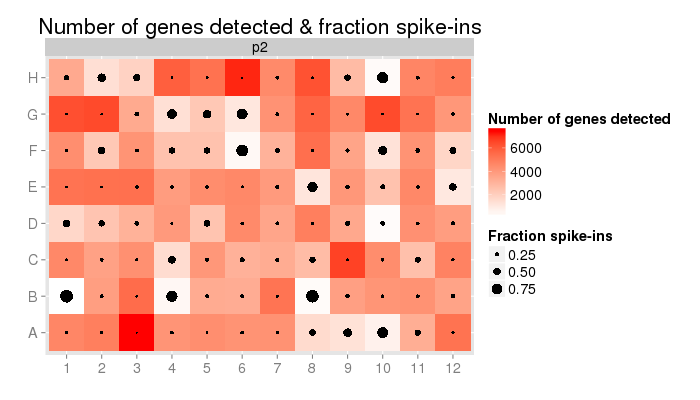

In [3]:
%%R -i df -w 700 -h 400

# Order the columns
df$column <- factor(df$column, levels=c(1:12))

# Make plots
gp <- ggplot(df, aes(column, row)) + geom_tile(aes(fill = no_genes))
gp <- gp + scale_fill_gradient(low="white", high = "red", na.value="grey", name="Number of genes detected") 
gp <- gp + geom_point(aes(size=fraction_spike))
gp <- gp + facet_wrap(~plate)
gp <- gp + labs(size = 'Fraction spike-ins')
gp <- gp + ggtitle("Number of genes detected & fraction spike-ins")
gp <- gp + xlab("")+ ylab("")
print(gp)

#ggsave(plot = gp, filename="number_genes_fraction_spike_per_plate.pdf", device=cairo_pdf)